<img src="./img/2022-11-22-23-30-56.png" width="500">

$$
\begin{align}
[\Sigma M_A = 0]\,\, R_1(4) - 600(3) &= 0 \notag\\
R_1 &= 450 \mathrm N \notag\\
R_2 &= 600 - 450 = 150  \mathrm N \notag
\end{align}
$$

<img src="img/2022-11-22-23-57-17.png" width="300">

$$
\begin{align}
\Sigma M_{CB} = EI{d^2y \over dx^2} &= 150x - {300 \over 2}\langle x-2 \rangle^2 \tag{1}\\
EI{dy \over dx} &= {150 \over 2}x^2 - {300 \over 6}\langle x-2 \rangle^3 + C_1 \tag{2}\\
EIy             &= {150 \over 6}x^3 - {300 \over 24}\langle x-2 \rangle^4 + C_1x + C_2 \tag{3}\\
\end{align}
$$

สมการโก่งตัว ที่ x=0, y=0 ตัด (x-2)^4 ทิ้งไป
$$
EIy = 0 = C_2 \\
C_2 = 0
$$

สมการโก่งตัว ที่ x=L, y=0 
$$
EIy = 0 = {150 \over 6}(4)^3 - {300 \over 24}\langle 4-2 \rangle^4 + C_1(4)  \\
C_1 = -350 \notag
$$

$$\therefore EIy  = {150 \over 6}x^3 - {300 \over 24}\langle x-2 \rangle^4 -350x  \tag{3} $$

ที่ x=2m ตัด (x-2)^4 ทิ้งไป <br>
$$
EIy  = {150 \over 6}x^3 -350x \notag\\
EIy  = {150 \over 6}2^3 -350(2) \notag\\
EIy = -500 \,\mathrm {N \cdot m^3}
$$

ถ้ากำหนด y = 4/360 , E=10*10^9<br>
$$
EIy = 500 \notag\\
I = {500 \over (10*10^9)(1/90)} = 4.5 * 10^{-6} \,\mathrm m^4
$$

In [2]:
from sympy import *
from sympy.physics.continuum_mechanics.beam import Beam

L=4
E, I, x = symbols('E, I, x')
R1, R2 = symbols('R1, R2')
bm = Beam(L, E, I, x)
bm.apply_load(R1, 0, -1)
bm.apply_load(R2, L, -1)
bm.apply_load(300, 0, 0, end=2)  # W

# find reaction load at A, B
bm.bc_deflection = [(0, 0), (L, 0)]
bm.solve_for_reaction_loads(R1, R2)
bm.reaction_loads

{R1: -450, R2: -150}

In [3]:
y = bm.deflection()
y

(450*x - 75*SingularityFunction(x, 0, 3) + 25*SingularityFunction(x, 0, 4)/2 - 25*SingularityFunction(x, 2, 4)/2 - 25*SingularityFunction(x, 4, 3))/(E*I)

In [4]:
solve(Eq(y,4/360).subs({E:10e9, x:2}),I)

[4.50000000000000e-6]

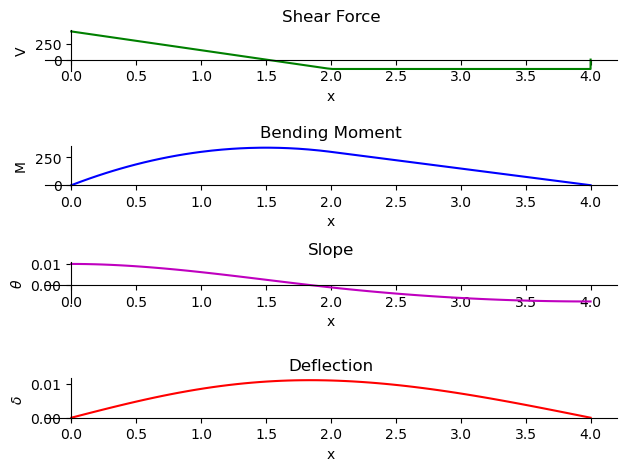

In [6]:
bm.plot_loading_results(subs={E:10e9, I:4.5e-6})